<a href="https://colab.research.google.com/github/NoelleI/Udacity-Deployment/blob/master/Heartbeat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:


'''Step 1 Detect Skin 
this code was adapted from https://www.pyimagesearch.com/2014/08/18/skin-detection-step-step-example-using-python-opencv/
and
https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/'''

# import the necessary packages
import imutils
import numpy as np
import argparse
import cv2
from matplotlib import pyplot
from google.colab.patches import cv2_imshow


# define the upper and lower boundaries of the HSV pixel
# intensities to be considered 'skin'

#take out the skin detection:
#lower = np.array([0, 0, 0], dtype = "uint8")
#upper = np.array([255, 255, 255], dtype = "uint8")

#include the skin detection:
lower = np.array([0, 48, 80], dtype = "uint8")
upper = np.array([20, 255, 255], dtype = "uint8")



camera = cv2.VideoCapture("IMG_4327.MOV")  
n_frames = int(camera.get(cv2.CAP_PROP_FRAME_COUNT))
classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
print(n_frames)




ra = []
ga = []
ba = []
box = []

# keep looping over the frames in the video
for i in range(n_frames):
    
    print(i)
	# grab the current frame
    (grabbed, frame) = camera.read()
	# if we are viewing a video and we did not grab a
	# frame, then we have reached the end of the video
	# resize the frame, convert it to the HSV color space,
	# and determine the HSV pixel intensities that fall into
	# the speicifed upper and lower boundaries
    if grabbed:
        frame = imutils.resize(frame, width = 400)
        frame = imutils.rotate(frame, 180)
        converted = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        skinMask = cv2.inRange(converted, lower, upper)
	# apply a series of erosions and dilations to the mask
	# using an elliptical kernel
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
        skinMask = cv2.erode(skinMask, kernel, iterations = 2)
        skinMask = cv2.dilate(skinMask, kernel, iterations = 2)
	# blur the mask to help remove noise, then apply the
	# mask
        skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)
        skin = cv2.bitwise_and(frame, frame, mask = skinMask)

        bboxes = classifier.detectMultiScale(skin, 1.05, 8)
        print('len bboxes:', len(bboxes))
        if box == []:  
          if len(bboxes) ==0:
            print("face not detected in first frame")
            cv2_imshow(np.vstack([frame, skin]))  ##change to an assert later
          else:
            box = bboxes[0]
#choose the box most like the last frame, if more than one box. If zero boxes, use box from last frame
        else:
          if len(bboxes) ==0:
            box = box   
            print("old box used") 
          else:
           test2 = np.zeros(len(bboxes))
           for i, boxnew in enumerate(bboxes):
            [xn, yn, widthn, heightn] = boxnew 
            x2n = xn + widthn
            y2n = yn + heightn
           	# draw a rectangle mask and compare to box from previous frame
            tempn = np.zeros([frame.shape[0], frame.shape[1]])
            tempn = tempn.astype(np.uint8)
            cv2.rectangle(tempn, (xn, yn), (x2n, y2n), (255,255,255), -1)
            test = cv2.bitwise_and(temp, temp, mask = tempn)
            test2[i] = np.mean(test)
           boxt = bboxes[np.argmax(test2)]
           if boxt[3] <= width*0.9 or boxt[3] >= width*1.1:
             box = box
             print("old box used")
             
           else:
             box = boxt
             print("nearest box used")
            
	# extract
        [x, y, width, height] = box 
        x2 = x + width
        y2 = y + height
        x2 = int(x2 - 0.2*width)
        x = int(x + 0.2*width)
        #y2 = int(y2 - 0.8*height)
           	# draw a rectangle over the pixels
        temp = np.zeros([frame.shape[0], frame.shape[1]])
        cv2.rectangle(temp, (x, y), (x2, y2), (255,255,255), -1)
        temp = temp/255
        temp = temp.astype(np.uint8)
        skin = cv2.bitwise_and(skin, skin, mask = temp)
        #cv2_imshow(np.vstack([frame, skin]))



        #find the average red, green and blue in the skin
        N = 0
        r=0
        g=0
        b=0
        skinr = skin[:,:,0].reshape(-1)
        sking = skin[:,:,1].reshape(-1)
        skinb = skin[:,:,2].reshape(-1)

        #print(skinMask.shape)
        for i, pixel in enumerate(skinMask.reshape(-1)):
          if  not pixel==0:
            r += skinr[i]
            g += sking[i]
            b += skinb[i]
            N+=1
        ra += [r/N] 
        ga += [g/N]
        ba += [b/N]




	# show the skin in the image along with the mask
      
        #cv2_imshow(np.vstack([frame, skin]))
# cleanup the camera and close any open windows
camera.release()
cv2.destroyAllWindows()

1858
0
len bboxes: 1
1
len bboxes: 1
nearest box used


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:71: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Streaming output truncated to the last 5000 lines.
nearest box used
192
len bboxes: 1
nearest box used
193
len bboxes: 1
nearest box used
194
len bboxes: 1
nearest box used
195
len bboxes: 1
nearest box used
196
len bboxes: 1
nearest box used
197
len bboxes: 1
nearest box used
198
len bboxes: 1
nearest box used
199
len bboxes: 1
nearest box used
200
len bboxes: 1
nearest box used
201
len bboxes: 1
nearest box used
202
len bboxes: 1
nearest box used
203
len bboxes: 1
nearest box used
204
len bboxes: 1
nearest box used
205
len bboxes: 1
nearest box used
206
len bboxes: 1
nearest box used
207
len bboxes: 1
nearest box used
208
len bboxes: 1
nearest box used
209
len bboxes: 1
nearest box used
210
len bboxes: 1
nearest box used
211
len bboxes: 1
nearest box used
212
len bboxes: 1
nearest box used
213
len bboxes: 1
nearest box used
214
len bboxes: 1
nearest box used
215
len bboxes: 1
nearest box used
216
len bboxes: 1
nearest box used
217
len bboxes: 1
nearest box used
218
len bboxes: 1
near

In [44]:
ra = np.array(ra)

In [45]:
np.argmin(ra)

1553

In [46]:
ra[np.argmin(ra)]

18.324628227351518

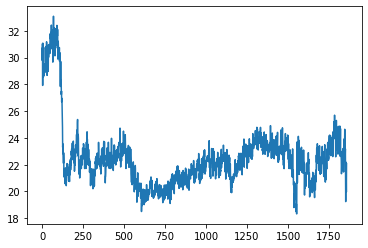

In [47]:
import matplotlib.pyplot as plt

plt.plot(ra)

In [48]:
ga = np.array(ga)
ba = np.array(ba)

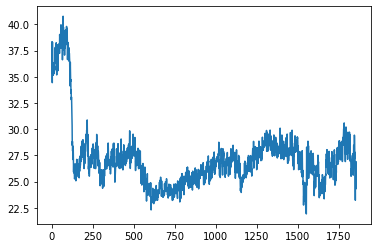

In [49]:
plt.plot(ga)

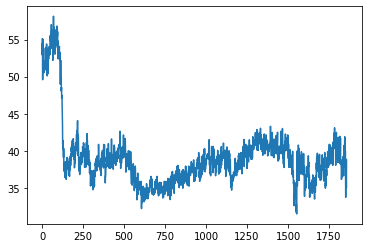

In [50]:
plt.plot(ba)

In [51]:
from sklearn.decomposition import FastICA
from scipy import signal
transformer = FastICA(n_components=3)

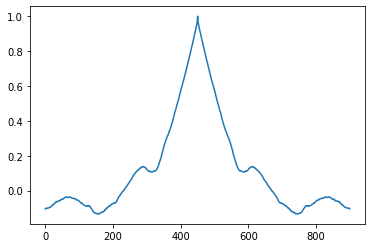

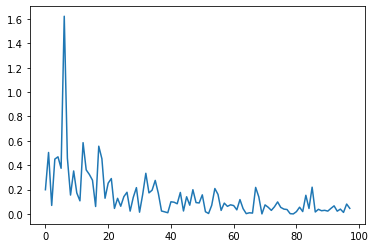

1.6222106617649021 0.5853247958222643
estimated heartrate x1 56.0


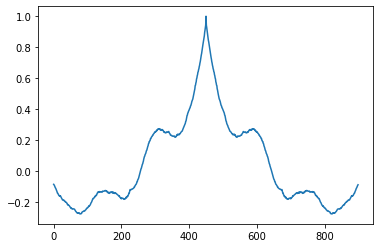

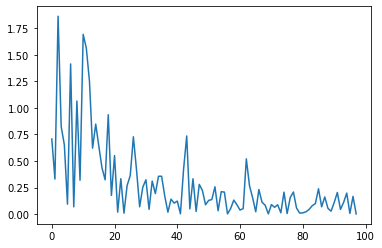

1.8622975914916309 1.6917316438322885
waiting x2


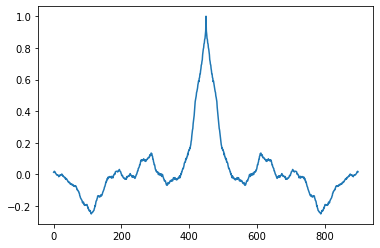

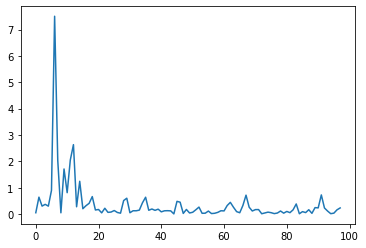

7.50552955455371 2.6322456226187687
estimated heartrate x0 56.0


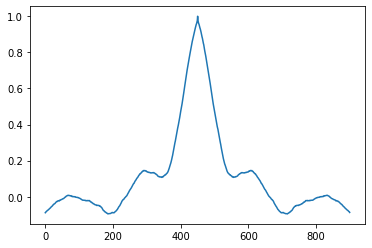

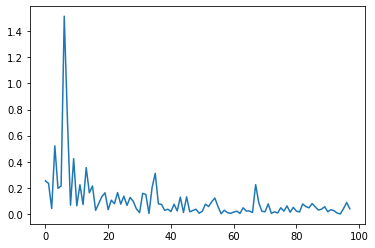

1.5149737747746992 0.5213558772883206
estimated heartrate x1 56.0


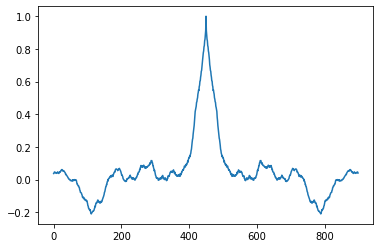

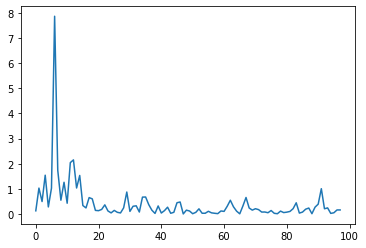

7.868448503396069 2.150469013644105
estimated heartrate x2 56.0


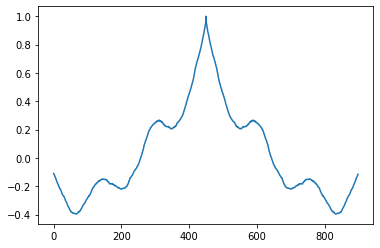

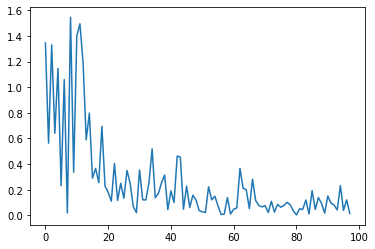

1.545873898406758 1.494991473864467
waiting x0


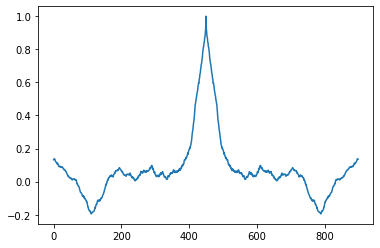

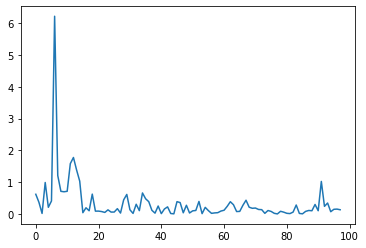

6.217367533975836 1.7772493384002397
estimated heartrate x1 56.0


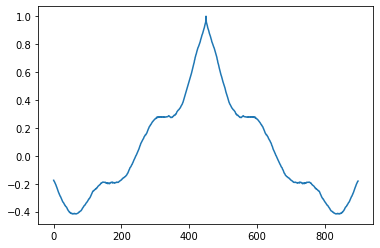

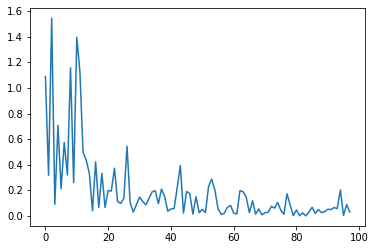

1.5449609363796493 1.3956065948004213
waiting x2


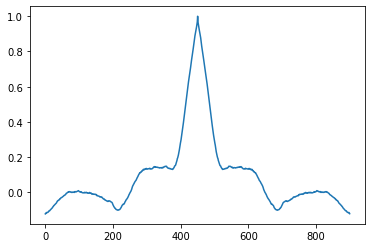

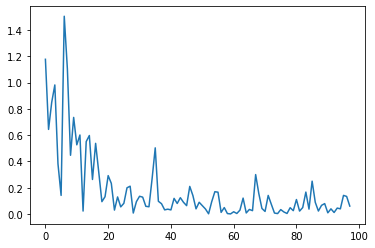

1.5050496379255371 1.1773583192930344
waiting x0


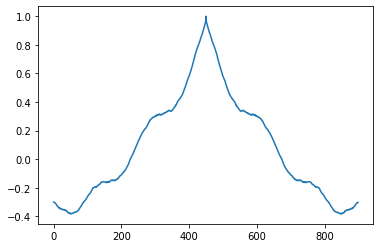

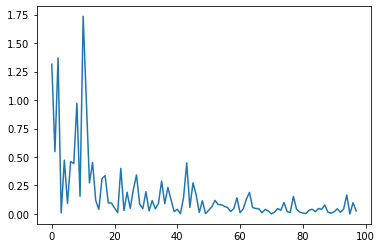

1.7360747961987446 1.3701213385088173
waiting x1


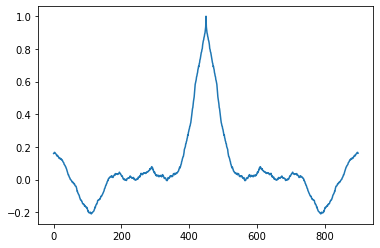

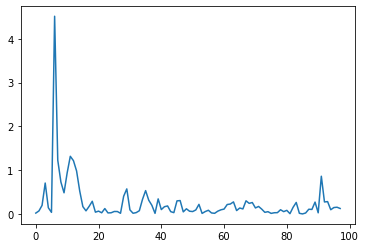

4.513918094259625 1.3193335278912839
estimated heartrate x2 56.0


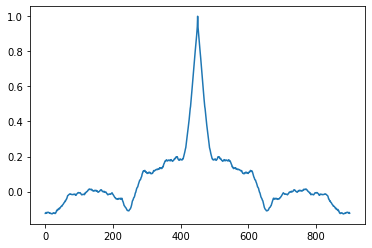

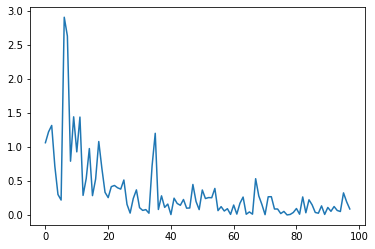

2.9097496359433253 1.4447303846845696
estimated heartrate x0 56.0


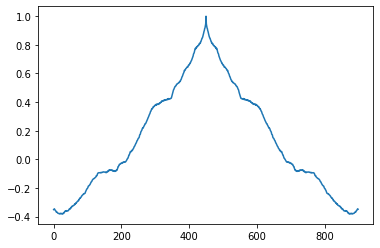

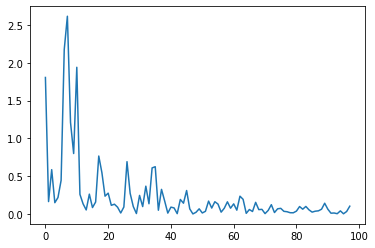

2.617456631939868 1.9417108572006716
waiting x1


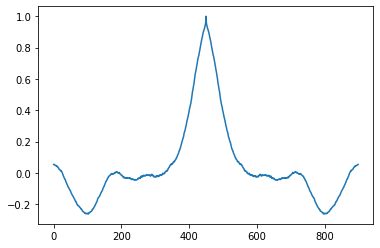

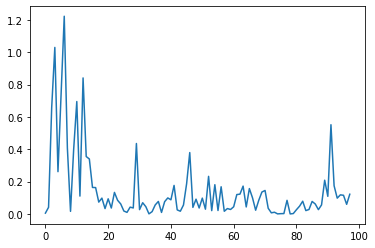

1.2230033956662691 1.030146879401894
waiting x2


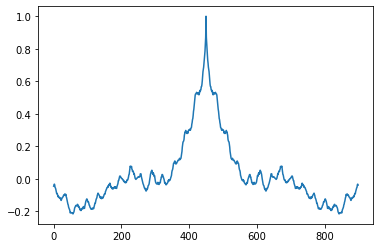

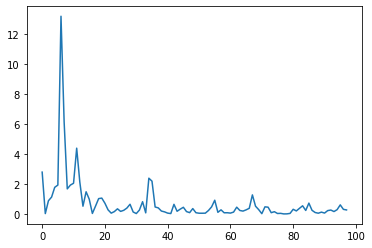

13.201836579931125 4.407127856818623
estimated heartrate x0 56.0


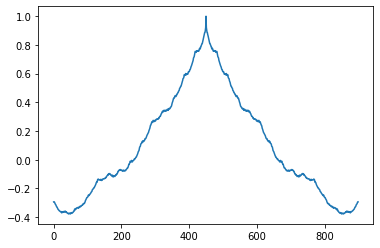

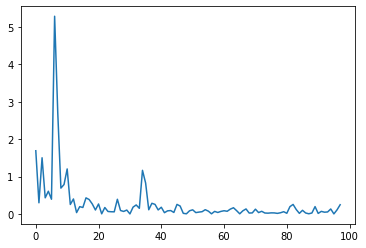

5.2826333961871486 1.689908954868237
estimated heartrate x1 56.0


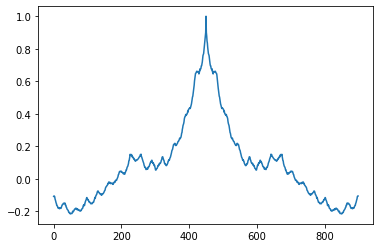

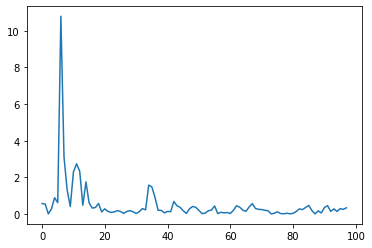

10.79043270596966 2.7363661220031257
estimated heartrate x2 56.0


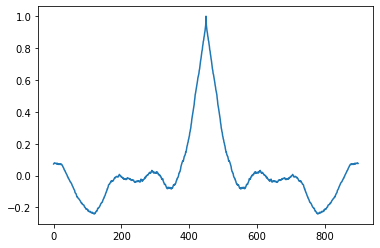

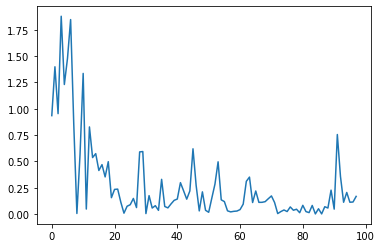

1.8780391206650917 1.8464516369838866
waiting x0


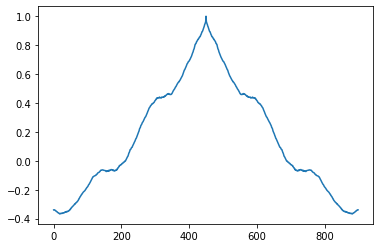

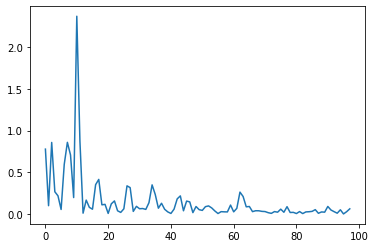

2.373201044434086 0.8593691195292398
estimated heartrate x1 64.0


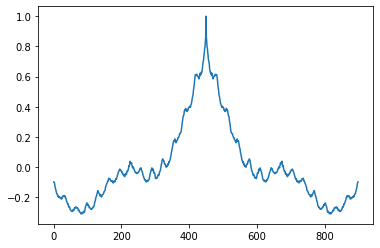

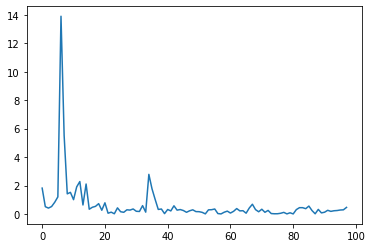

13.894594076296059 2.7832190180845333
estimated heartrate x2 56.0


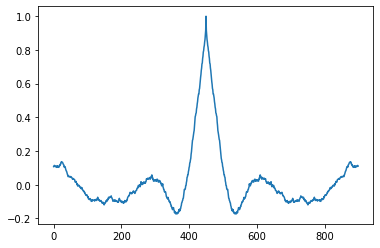

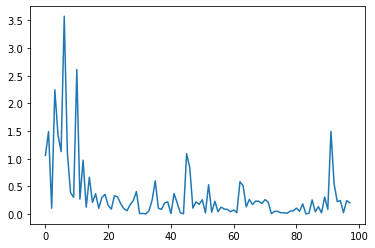

3.576625673268656 2.610996110273158
waiting x0


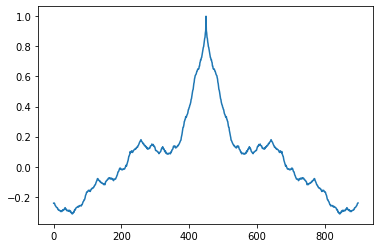

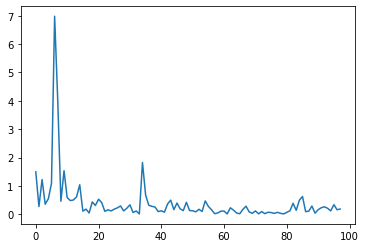

6.980429706330049 1.8225453370303926
estimated heartrate x1 56.0


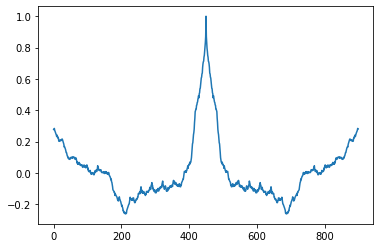

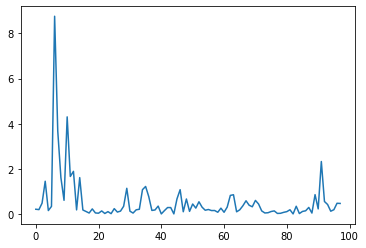

8.755769424883484 4.301600955635194
estimated heartrate x2 56.0


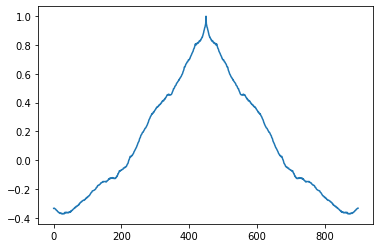

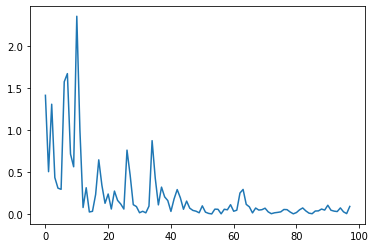

2.349809699983944 1.6682478605909894
waiting x0


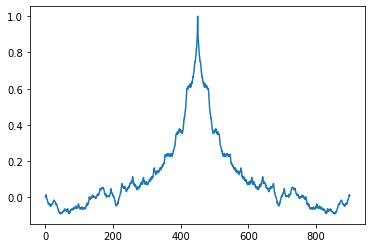

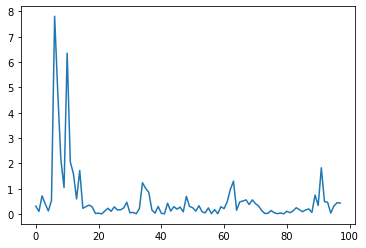

7.810922804279188 6.354090683787198
waiting x1


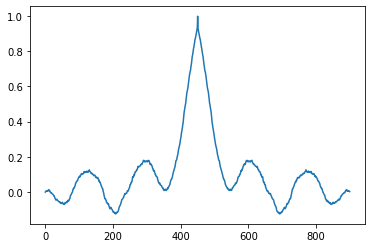

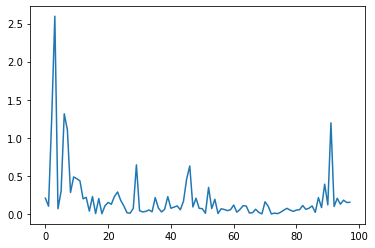

2.595356875909966 1.3147112040900177
estimated heartrate x2 50.0


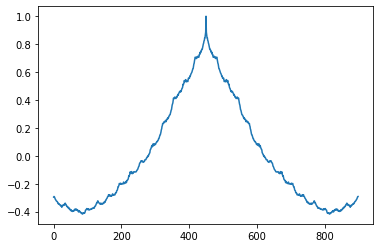

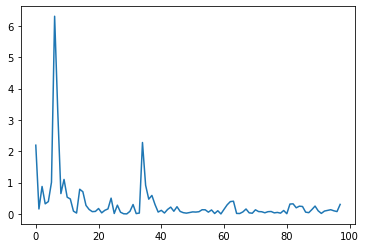

6.3043871238923375 2.2796956170364657
estimated heartrate x0 56.0


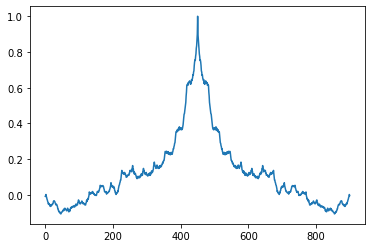

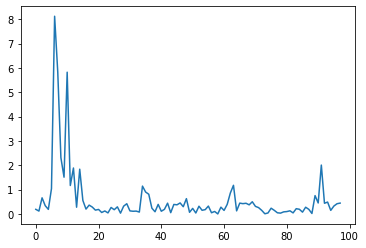

8.12635523403713 5.825996582177558
waiting x1


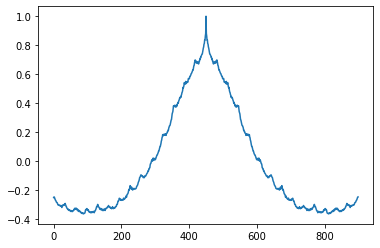

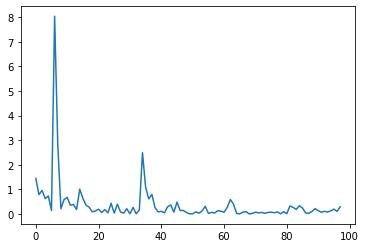

8.04081719842879 2.4922487437885503
estimated heartrate x2 56.0


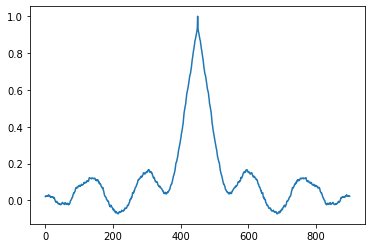

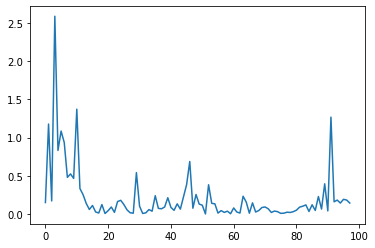

2.588794326832781 1.3722294699936128
estimated heartrate x0 50.0


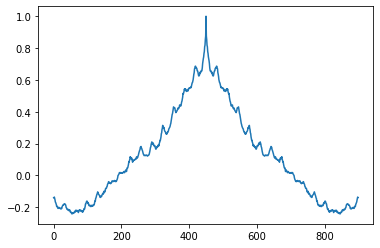

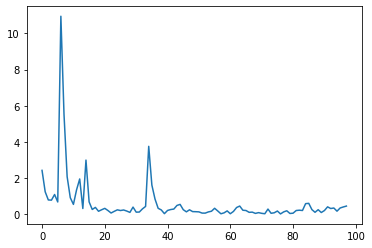

10.955660832476989 3.745851646147954
estimated heartrate x1 56.0


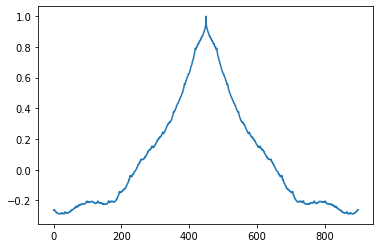

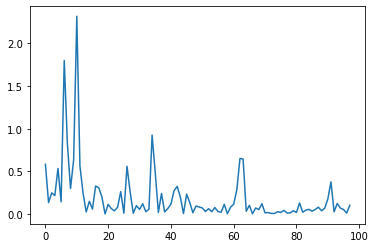

2.3173210825123722 1.7992363147524966
waiting x2


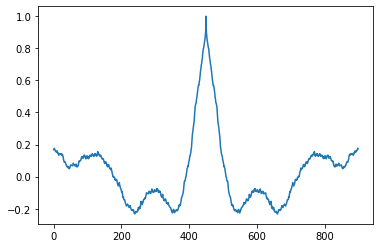

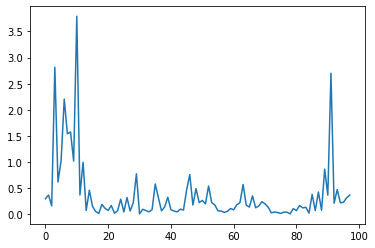

3.7907196773779233 2.813648065746358
waiting x0


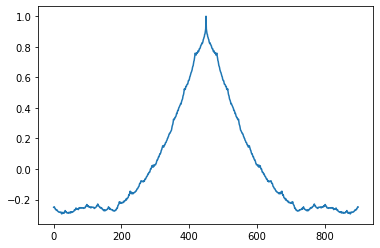

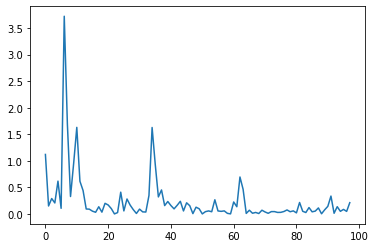

3.722067978361917 1.6304464797889568
estimated heartrate x1 56.0


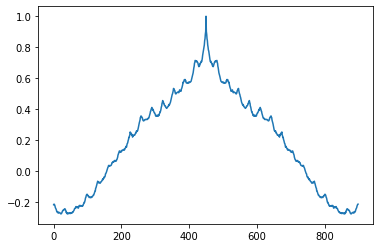

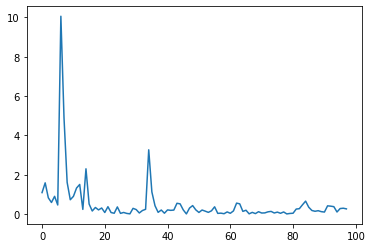

10.062370434277202 3.269008571632006
estimated heartrate x2 56.0


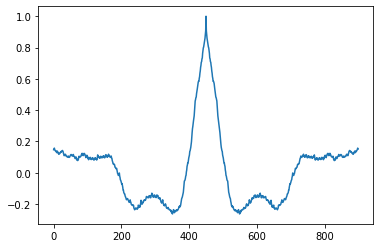

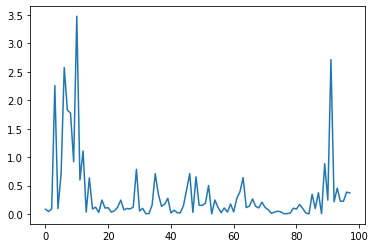

3.4778863994822435 2.715080457252876
waiting x0


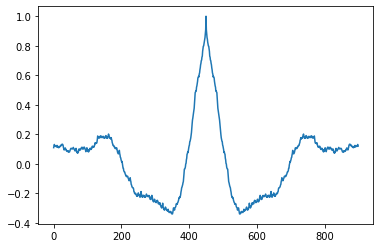

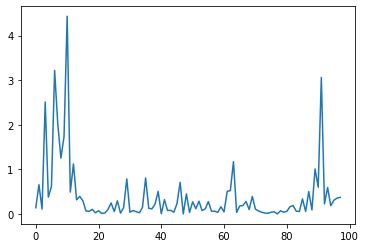

4.433687679716916 3.220792068231659
waiting x1


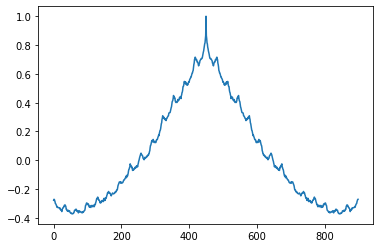

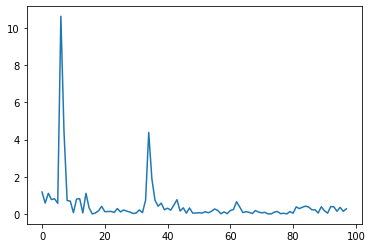

10.629337932824567 4.382465620066011
estimated heartrate x2 56.0


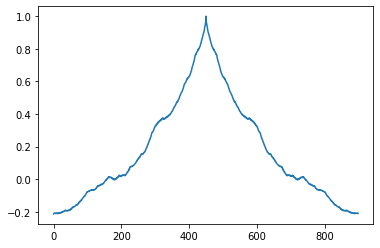

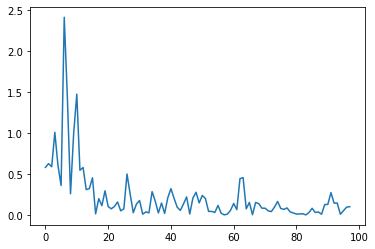

2.414979253148788 1.4757928121892165
waiting x0


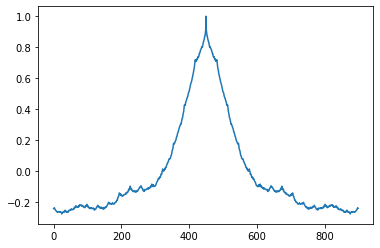

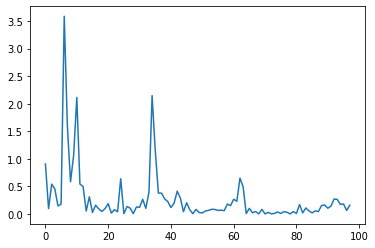

3.5879718125322966 2.1474018452382455
estimated heartrate x1 56.0


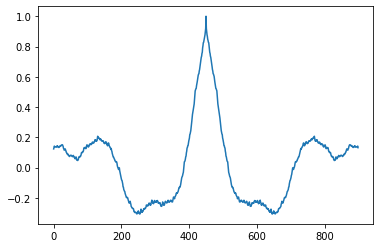

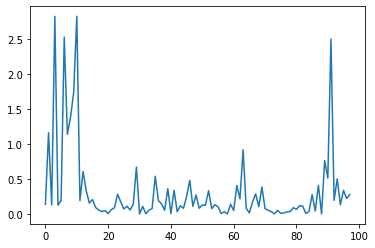

2.8278415503154677 2.825887223762524
waiting x2


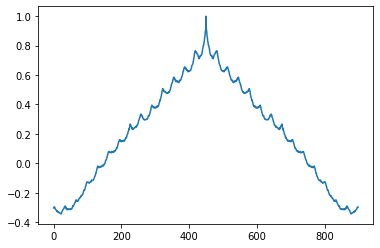

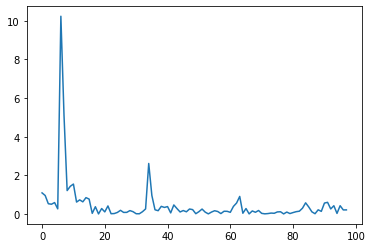

10.23806705510173 2.6126992095040906
estimated heartrate x0 56.0


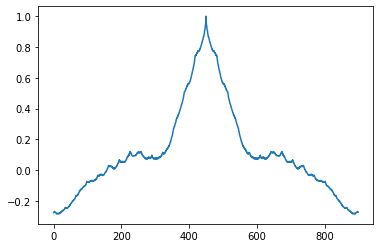

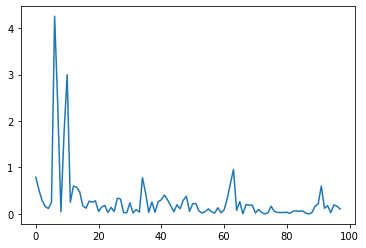

4.254694651163323 2.995116659677322
waiting x1


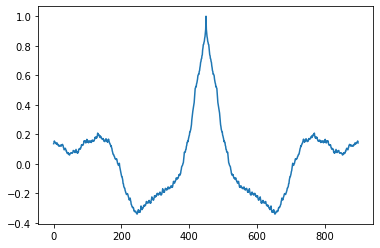

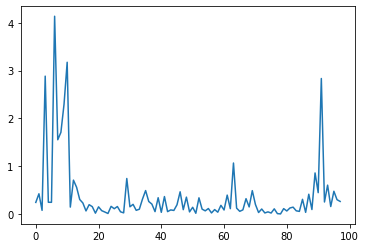

4.136172185738131 3.173454985413692
waiting x2


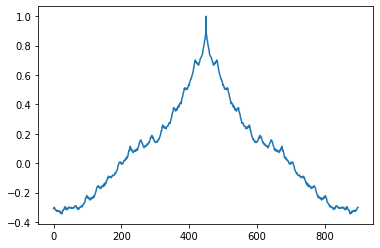

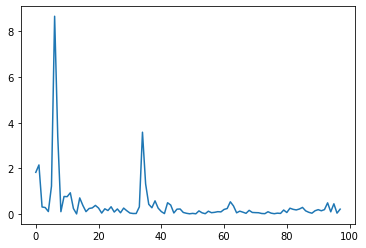

8.663807435050023 3.5817192950794077
estimated heartrate x0 56.0


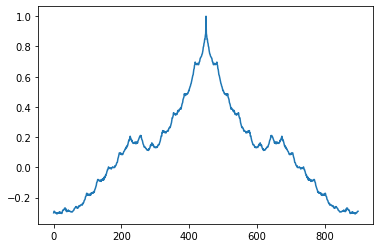

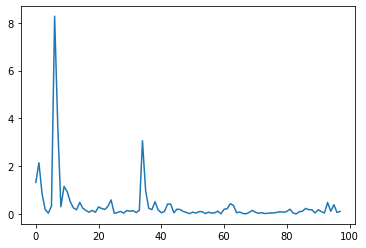

8.27478080651951 3.062717509201794
estimated heartrate x1 56.0


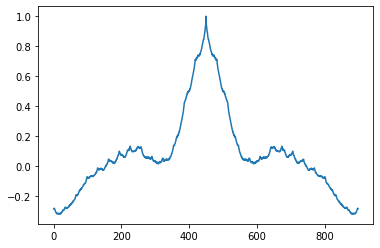

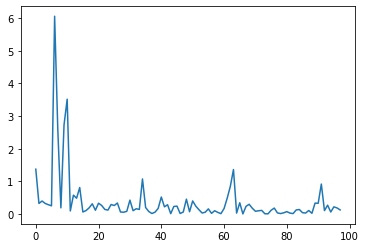

6.0598825278819035 3.518848275831827
estimated heartrate x2 56.0


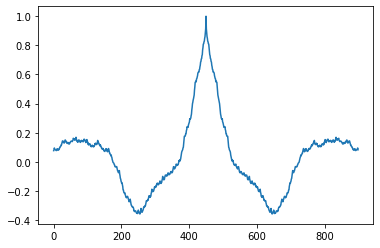

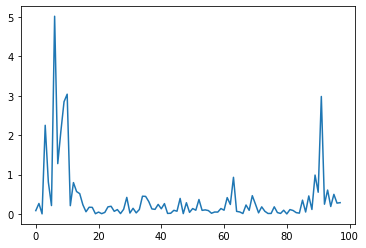

5.0216085836115605 3.0423407516794505
waiting x0


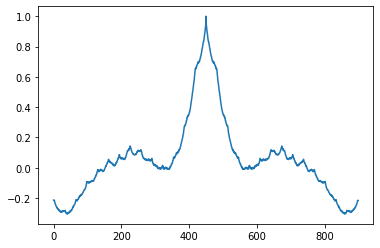

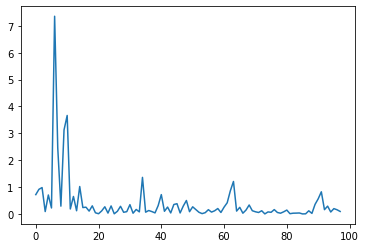

7.355851807302139 3.6647879134144588
estimated heartrate x1 56.0


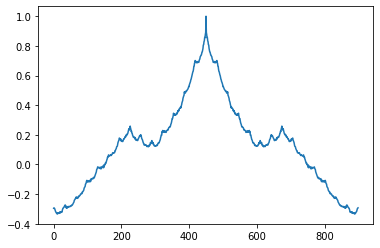

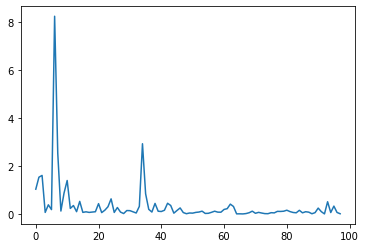

8.237375408352019 2.9270870075769726
estimated heartrate x2 56.0


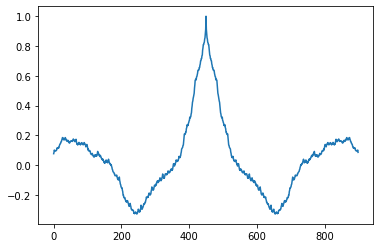

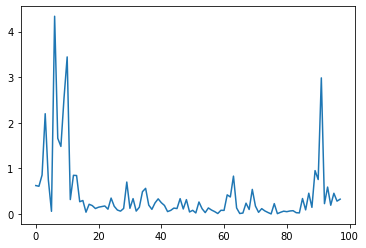

4.338189817646014 3.445452249598929
waiting x0


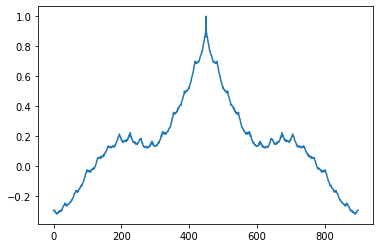

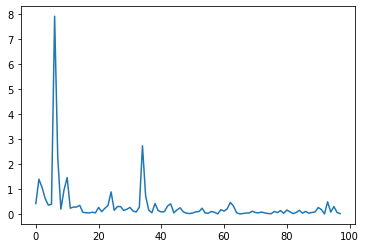

7.917861364400063 2.7294585363226465
estimated heartrate x1 56.0


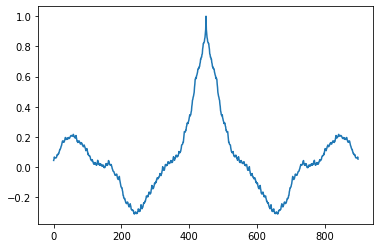

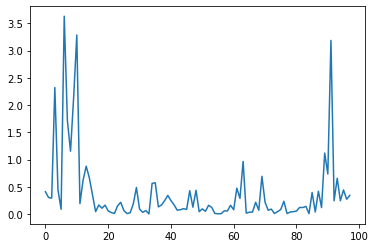

3.6307568749048924 3.2852644775362587
waiting x2


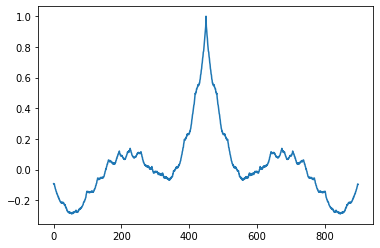

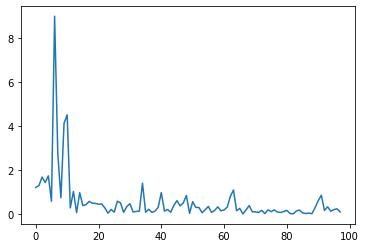

8.999627257719338 4.5112795590608785
estimated heartrate x0 56.0


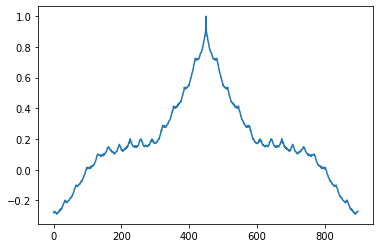

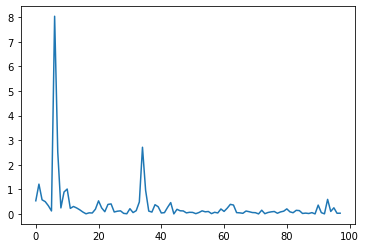

8.043610294062676 2.713044912742961
estimated heartrate x1 56.0


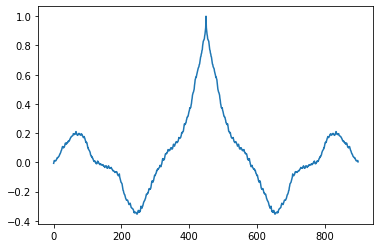

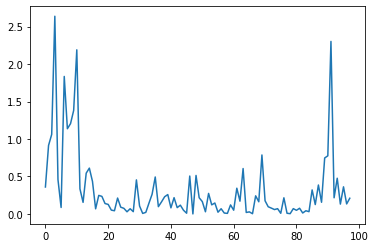

2.6380593561524193 2.3021392258300284
waiting x2


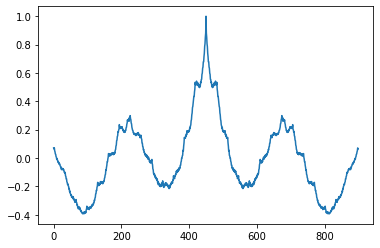

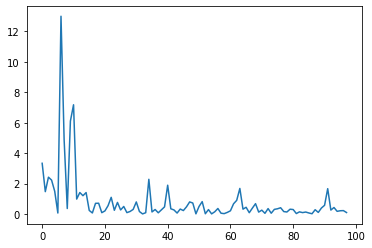

12.996347833742513 7.177702359054241
estimated heartrate x0 56.0


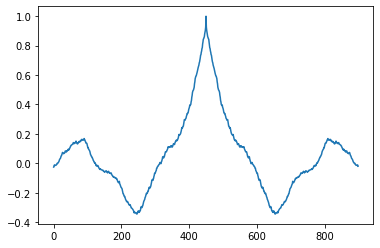

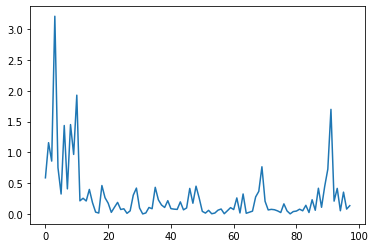

3.2083646068883076 1.9284235848746254
waiting x1


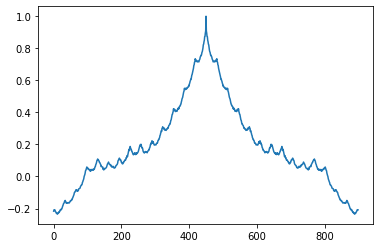

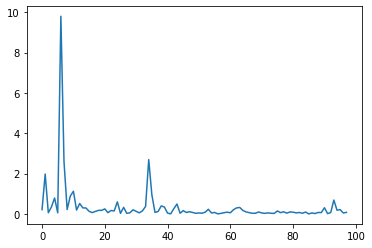

9.801111069248444 2.6955467075333828
estimated heartrate x2 56.0


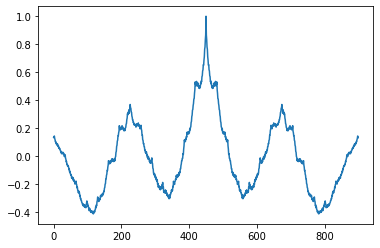

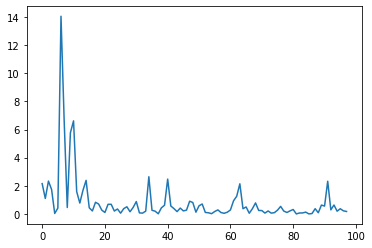

14.052297113896415 6.614821178198674
estimated heartrate x0 56.0


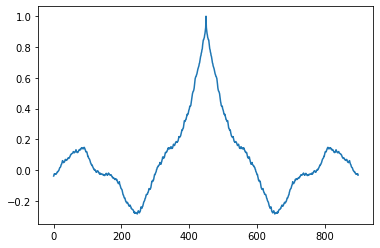

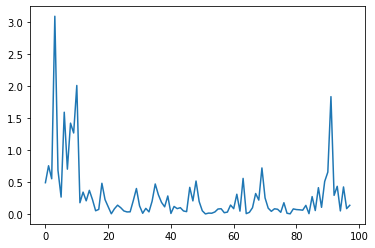

3.0875474970305654 2.006858283501989
waiting x1


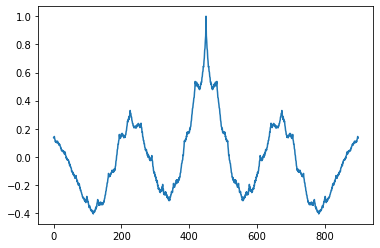

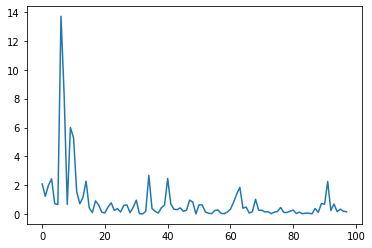

13.702105693195518 5.99859157909014
estimated heartrate x2 56.0


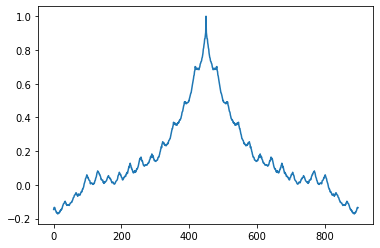

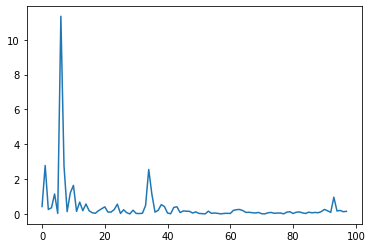

11.353801392586242 2.783134716911647
estimated heartrate x0 56.0


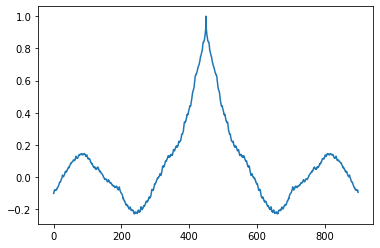

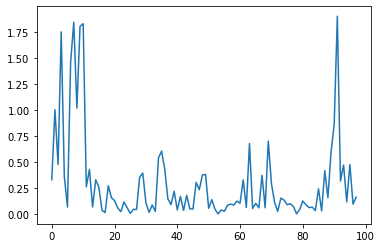

1.9024829384455053 1.8453983648768797
waiting x1


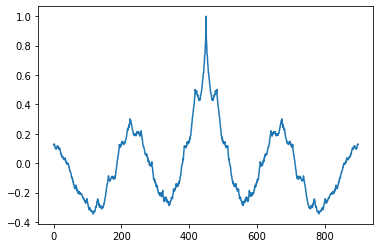

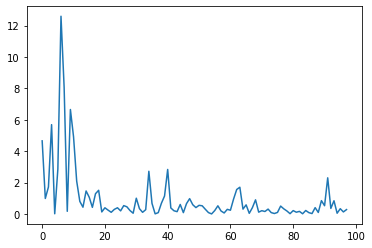

12.59428886384078 6.65345645457659
estimated heartrate x2 56.0


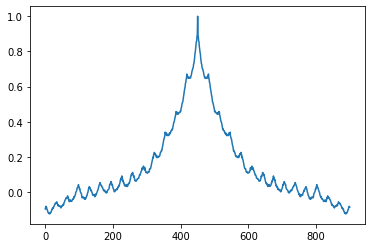

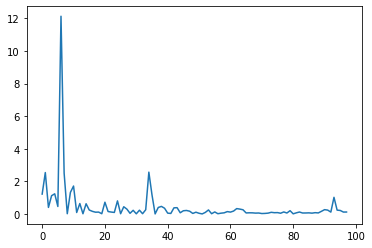

12.133443940686776 2.5642167606850603
estimated heartrate x0 56.0


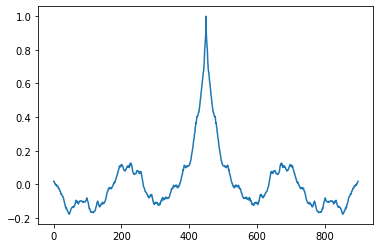

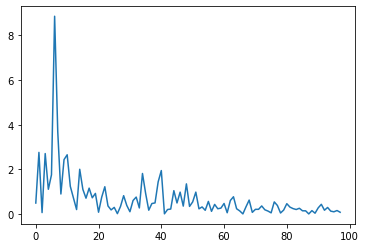

8.862533857488229 2.7615503698268085
estimated heartrate x1 56.0


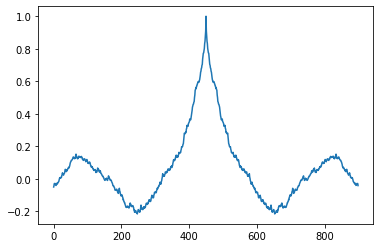

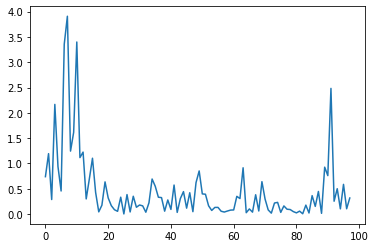

3.9082683233789686 3.3994974444203327
waiting x2


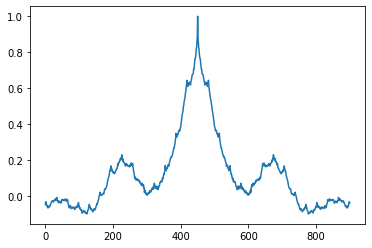

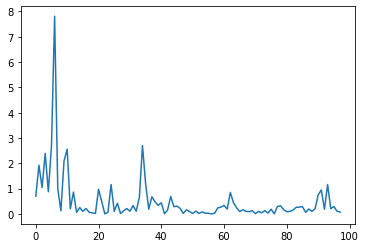

7.80858986650169 2.701107506912899
estimated heartrate x0 56.0


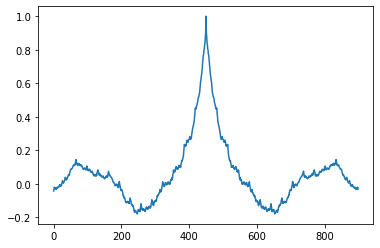

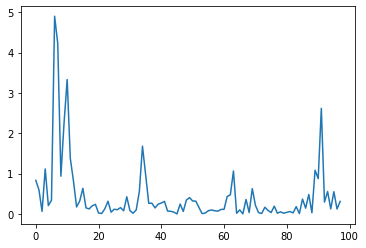

4.898416183725542 3.330723220393765
waiting x1


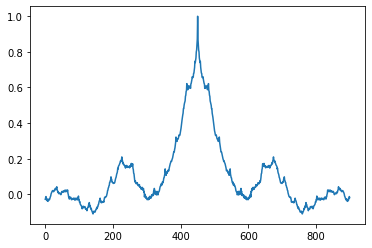

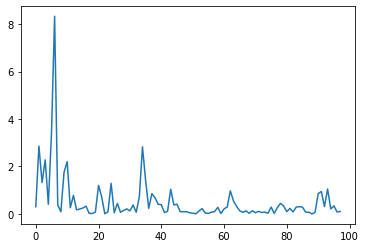

8.334570086049538 2.8595638544132562
estimated heartrate x2 56.0


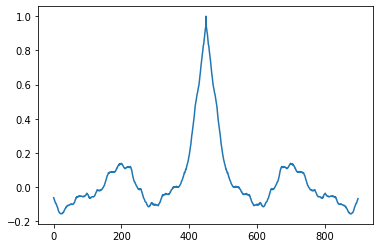

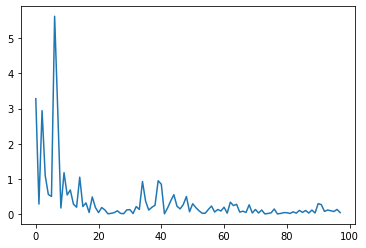

5.626340097292872 3.2803976101100556
estimated heartrate x0 56.0


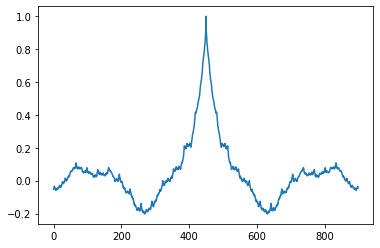

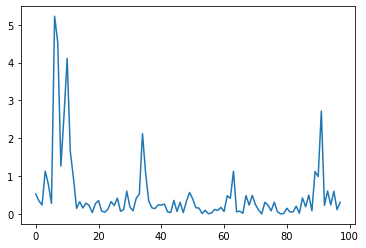

5.222800984015899 4.109718126075621
waiting x1


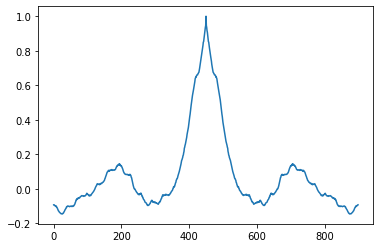

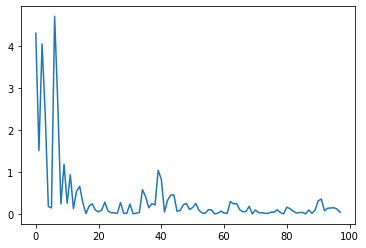

4.704868693783396 4.301012075635102
waiting x2


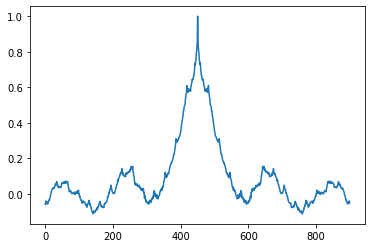

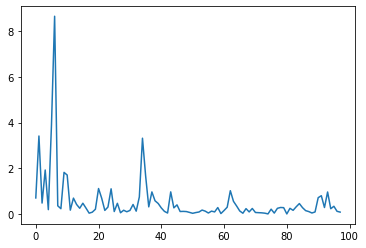

8.656871388776164 3.412010718020205
estimated heartrate x0 56.0


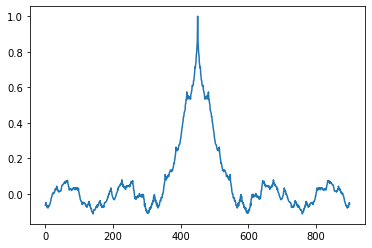

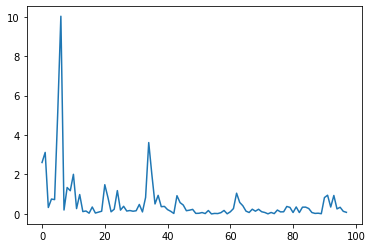

10.021214500939543 3.6173363603567967
estimated heartrate x1 56.0


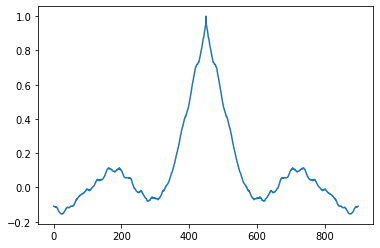

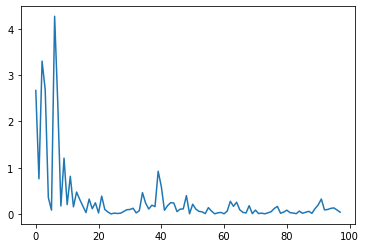

4.274392512027599 3.305041402241709
waiting x2


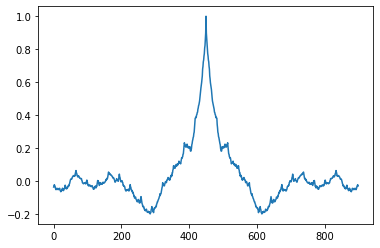

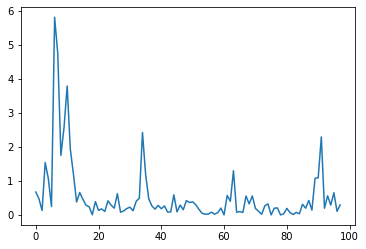

5.808734283399851 3.789385716810968
waiting x0


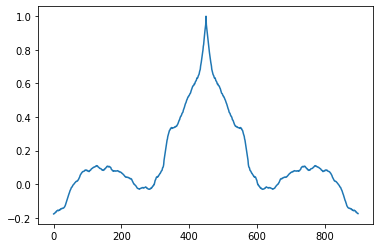

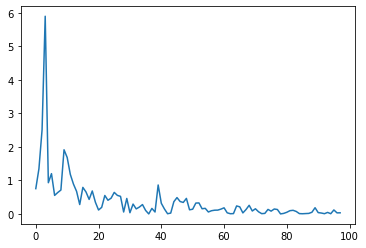

5.893780266042475 1.9131614451453802
estimated heartrate x1 50.0


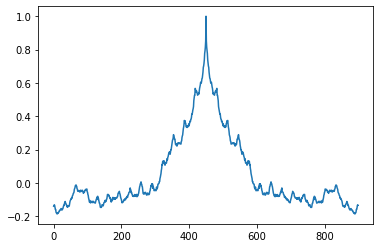

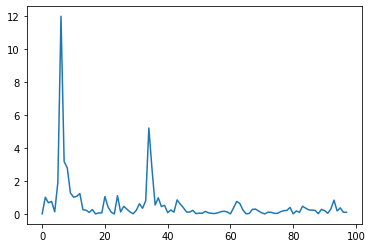

11.99700987936879 5.216054465554386
estimated heartrate x2 56.0


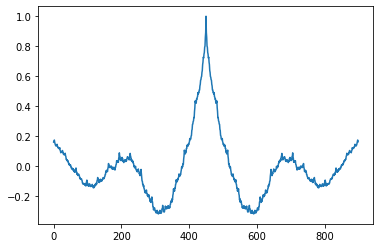

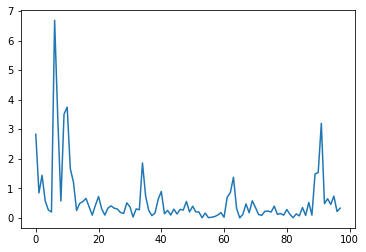

6.687797937638243 3.747848894798988
estimated heartrate x0 56.0


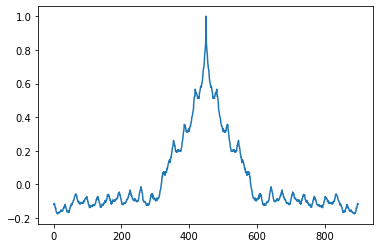

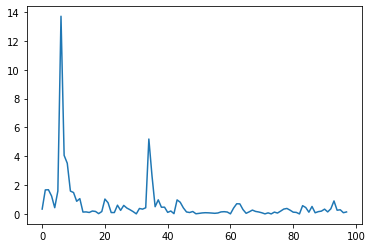

13.718968530038056 5.197489255478644
estimated heartrate x1 56.0


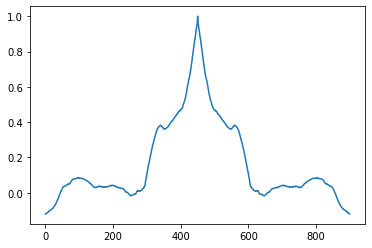

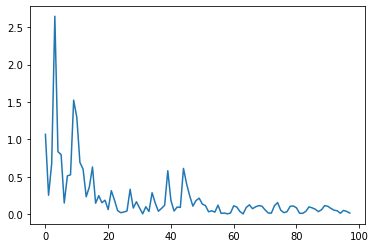

2.647004784390827 1.5237270746414018
estimated heartrate x2 50.0


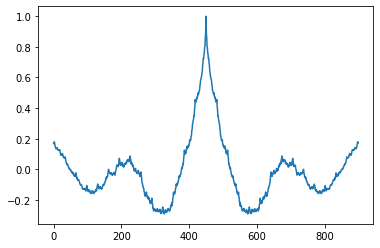

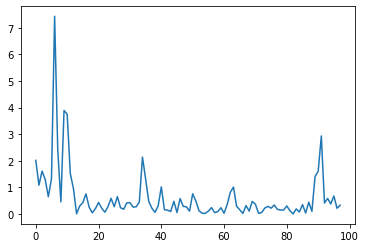

7.433556359949326 3.8902097546942525
estimated heartrate x0 56.0


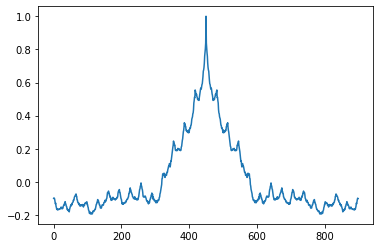

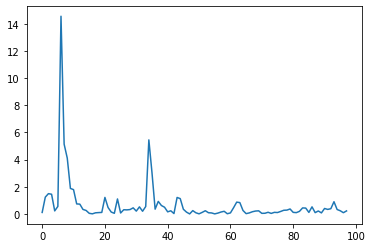

14.560188880405553 5.452970469311423
estimated heartrate x1 56.0


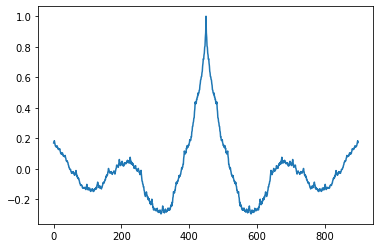

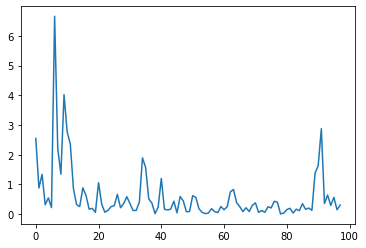

6.661804367797971 4.020245929191169
waiting x2


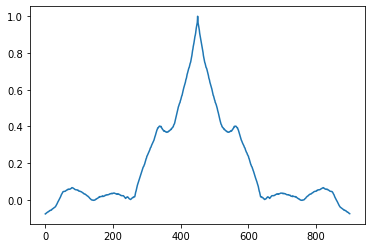

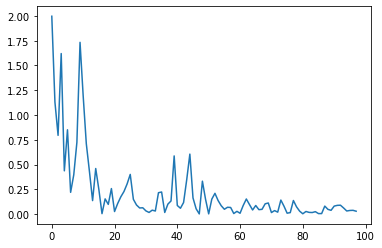

1.996992143848952 1.7335656874239125
waiting x0


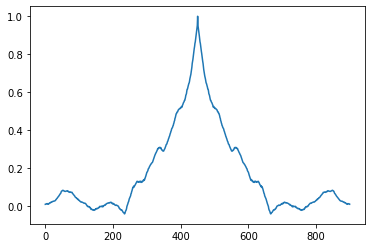

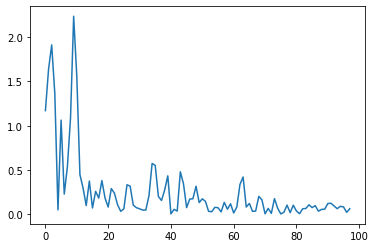

2.2384354190225686 1.914206840095456
waiting x1


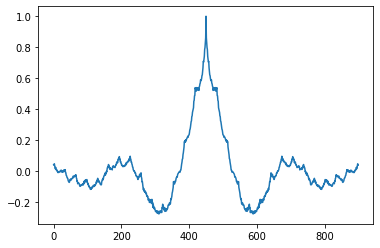

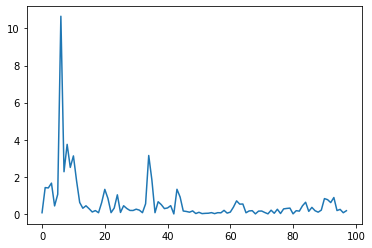

10.659035415631912 3.7505263915007143
estimated heartrate x2 56.0


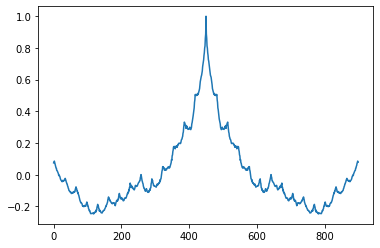

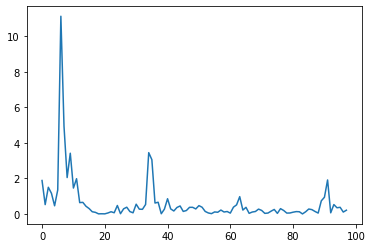

11.126024924706394 3.4496529675298175
estimated heartrate x0 56.0


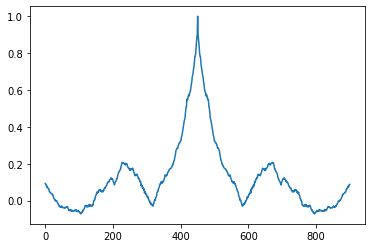

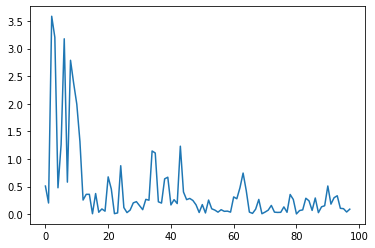

3.5860314310423247 3.17792699544591
waiting x1


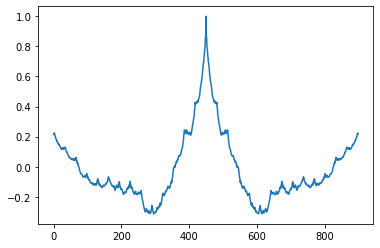

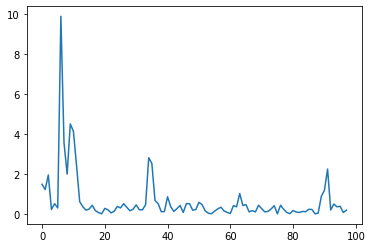

9.905264556877311 4.511289949298996
estimated heartrate x2 56.0


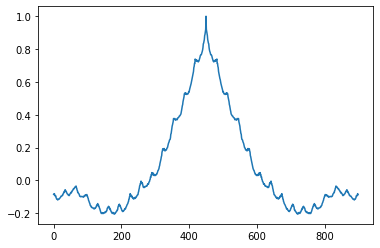

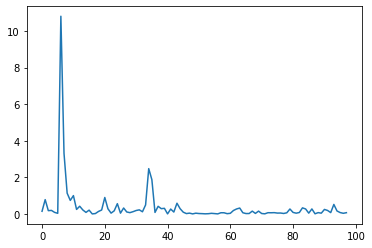

10.807888804763625 2.4760423438100427
estimated heartrate x0 56.0


In [52]:
#normalize over 30s windows as in Poe et al.
n30 = int((n_frames - 900)/30) #number of 30 second sliding windows
ran = np.zeros(900)
gan = np.zeros(900)
ban = np.zeros(900)
for i in range(n30):
  rav = np.mean(ra[i*30:i*30+900])
  gav = np.mean(ga[i*30:i*30+900])
  bav = np.mean(ba[i*30:i*30+900])
  rstd = np.std(ra[i*30:i*30+900])
  gstd = np.std(ga[i*30:i*30+900])
  bstd = np.std(ba[i*30:i*30+900])
  for j in range(900):
    ran[j] = (ra[i*30 + j] - rav)/rstd
    gan[j] = (ga[i*30 + j] - gav)/gstd
    ban[j] = (ba[i*30 + j] - bav)/bstd
  X = np.array(list(zip(ran,gan,ban)))
  X_transformed = transformer.fit_transform(X)
  X_indep = X_transformed.transpose()
  #plt.plot(X_indep[0])
  #plt.show()
  #plt.plot(X_indep[1])
  #plt.show()
  #plt.plot(X_indep[2])
  #plt.show()


  x1 = X_indep[1]
  x1_corr = signal.correlate(x1, x1, mode='same')
  plt.plot(x1_corr)
  plt.show()
  ff = np.fft.hfft(x1_corr[:int(len(x1_corr)/2)])
  fs_n = 30/len(x1_corr/2)
  upper = int(4/fs_n)
  lower = int(0.75/fs_n)
  plt.plot((abs(ff[lower:upper])))
  plt.show()
  hr1 = int((np.argmax(abs(ff[lower:upper])) + lower))
  max1 = np.max(abs(ff[lower:upper]))
  hr2array = np.concatenate([ff[lower:hr1 - 2], ff[hr1 + 2:upper]], axis = 0)
  max2 = np.max(abs(hr2array))
  print(max1, max2)
  if max2 <= 0.6*max1:
    hr1 = hr1*60*fs_n
    print("estimated heartrate x1", hr1)
  else:
    print("waiting x1")


  x2 = X_indep[2]
  x2_corr = signal.correlate(x2, x2, mode='same')
  plt.plot(x2_corr)
  plt.show()
  ff = np.fft.hfft(x2_corr[:int(len(x2_corr)/2)])
  fs_n = 30/len(x2_corr/2)
  upper = int(4/fs_n)
  lower = int(0.75/fs_n)
  plt.plot((abs(ff[lower:upper])))
  plt.show()
  hr1 = int((np.argmax(abs(ff[lower:upper])) + lower))
  max1 = np.max(abs(ff[lower:upper]))
  hr2array = np.concatenate([ff[lower:hr1 - 2], ff[hr1 + 2:upper]], axis = 0)
  max2 = np.max(abs(hr2array))
  print(max1, max2)
  if max2 <= 0.6*max1:
    hr1 = hr1*60*fs_n
    print("estimated heartrate x2", hr1)
  else:
    print("waiting x2")


  x0 = X_indep[0]
  x0_corr = signal.correlate(x0, x0, mode='same')
  plt.plot(x0_corr)
  plt.show()
  ff = np.fft.hfft(x0_corr[:int(len(x0_corr)/2)])
  fs_n = 30/len(x0_corr/2)
  upper = int(4/fs_n)
  lower = int(0.75/fs_n)
  plt.plot((abs(ff[lower:upper])))
  plt.show()
  hr1 = int((np.argmax(abs(ff[lower:upper])) + lower))
  max1 = np.max(abs(ff[lower:upper]))
  hr2array = np.concatenate([ff[lower:hr1 - 2], ff[hr1 + 2:upper]], axis = 0)
  max2 = np.max(abs(hr2array))
  print(max1, max2)
  if max2 <= 0.6*max1:
    hr1 = hr1*60*fs_n
    print("estimated heartrate x0", hr1)
  else:
    print("waiting x0")

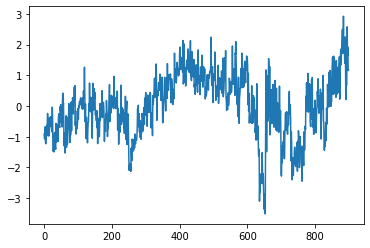

In [53]:
plt.plot(ran)

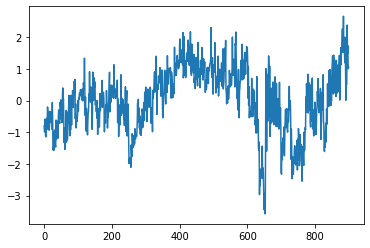

In [54]:
plt.plot(gan)

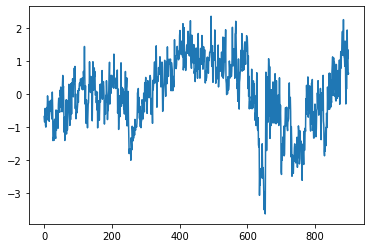

In [55]:

plt.plot(ban)